In [2]:
import numpy
import pandas
from pandas import concat

#linear regression calculation
from scipy import stats

#Import sampling helper
from sklearn.model_selection import train_test_split
#Import preprocessing modules
from sklearn import preprocessing
#Import random forest model
from sklearn.ensemble import RandomForestRegressor
#Import logist regression model
from sklearn.linear_model import LogisticRegression
#Import Linear regression model
from sklearn.linear_model import LinearRegression

#Import cross-validation pipelinePython
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Import evaluation metricsPython
from sklearn.metrics import mean_squared_error, r2_score

#Import module for saving scikit-learn modelsPython
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

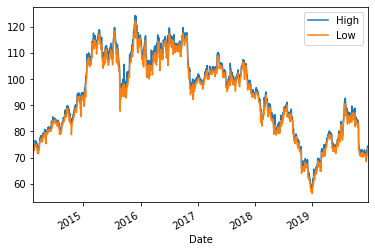

In [4]:
ABInbevQuandl = pandas.read_csv('https://www.quandl.com/api/v3/datasets/EURONEXT/ABI.csv?api_key=_czXMKeX32eTXGttzD8H',
                                parse_dates=[0],
                                index_col=[0])
ABInbevQuandl.sort_index(inplace=True)
ABInbevQuandl[['High','Low']].plot()

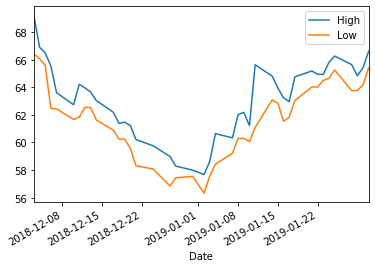

In [14]:
#Retrieve only the value for Jan 2019 (order of the value in the set is important for the selection)
ABSplitReg = ABInbevQuandl.loc['2018-12-01':'2019-01-31']
ABSplitReg[['High','Low']].plot()


In [15]:
ABSplitReg.reset_index(inplace=True)


Coef: 0.031432055749128995
Intercept [62.50526132 60.83567944]
Score 0.025180044969542816


C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


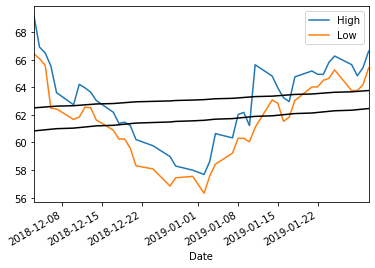

In [239]:
X = numpy.array(ABSplitReg.index).reshape(-1,1)
y = numpy.array(ABSplitReg[['High','Low']])
LinearReg = LinearRegression().fit(X,y)
y_reg=LinearReg.predict(X)
plt= ABSplitReg[['Date','High','Low']].plot(x='Date')
plt.plot(ABSplitReg['Date'], y_reg, color ='k')
print("Coef:", LinearReg.coef_)
print("Intercept", LinearReg.intercept_)
print("Score", LinearReg.score(X,y))



In [242]:
#to try to put in a dataframe
#from to score coeficient_high coeficient_low
SplitBasedOnRegression = pandas.DataFrame(columns=['Date','nbdays','score','coef_high','coef_low'])
X = numpy.array(ABSplitReg.index).reshape(-1,1)
y = numpy.array(ABSplitReg[['High','Low']])
index=0 
regEstimate=pandas.DataFrame()

#taking all combination of subset from -> to
#actually we don't take subset of 1 and 2 days 
#because there is no point to calculate regression with less than 3 points
for i in range(ABSplitReg.index.size-2):
    for j in range(i+3,ABSplitReg.index.size):        
        temp = LinearRegression().fit(X[i:j],y[i:j])
        y_reg = temp.predict(X[i:j])
        score=r2_score(y[i:j],y_reg)
        if (score >= 0.9):
            #regEstimate=pandas.concat([regEstimate,pandas.DataFrame(y_reg,index=ABSplitReg['Date'][i:j])])
            regEstimate=pandas.concat([regEstimate,pandas.DataFrame(temp.predict(X[j-1:j]),index=ABSplitReg['Date'][j-1:j])])
            SplitBasedOnRegression.loc[index] = \
                [ABSplitReg.loc[j-1,'Date'],\
                 j-i,\
                 score,\
                 temp.coef_[0].item(),\
                 temp.coef_[1].item()]
            index += 1
    



#print("Coef:", LinearReg.coef_)
#print("Intercept", LinearReg.intercept_)
#print("Score", LinearReg.score(X,y))
  


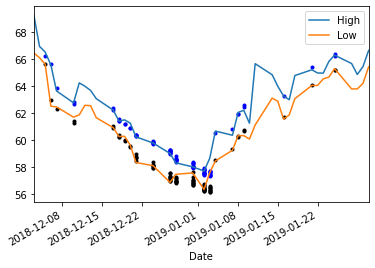

In [223]:
plt=ABSplitReg[['Date','High','Low']].plot(x='Date')
plt.scatter(x=regEstimate.index,y=regEstimate[0],color='b',marker='.')
plt.scatter(x=regEstimate.index,y=regEstimate[1],color='k',marker='.')

In [243]:
SplitBasedOnRegression.sort_values(by=['Date','nbdays'],ascending=[True,False])


,Date,nbdays,score,coef_high,coef_low
0,2018-12-05,3,0.927067,-1.365000,-0.415000
8,2018-12-06,3,0.900367,-0.685000,-1.795000
1,2018-12-07,5,0.901120,-1.259000,-1.157000
2,2018-12-10,6,0.930987,-1.237143,-1.079429
9,2018-12-10,5,0.913662,-1.124000,-1.196000
32,2018-12-17,4,0.933393,-0.592000,-0.587000
43,2018-12-17,3,0.994129,-0.730000,-0.815000
33,2018-12-18,5,0.963086,-0.662000,-0.625000
44,2018-12-18,4,0.995114,-0.766000,-0.758000
54,2018-12-18,3,0.999205,-0.830000,-0.695000


In [245]:
SplitBasedOnRegression.groupby(by='Date').agg({'nbdays': ['min','max','count'],\
                                              'coef_high': ['min','max','mean'],\
                                              'coef_low': ['min','max','mean']})

nbdays           coef_high                      coef_low            \
              min max count       min       max      mean       min       max   
Date                                                                            
2018-12-05      3   3     1 -1.365000 -1.365000 -1.365000 -0.415000 -0.415000   
2018-12-06      3   3     1 -0.685000 -0.685000 -0.685000 -1.795000 -1.795000   
2018-12-07      5   5     1 -1.259000 -1.259000 -1.259000 -1.157000 -1.157000   
2018-12-10      5   6     2 -1.237143 -1.124000 -1.180571 -1.196000 -1.079429   
2018-12-17      3   4     2 -0.730000 -0.592000 -0.661000 -0.815000 -0.587000   
2018-12-18      3   5     3 -0.830000 -0.662000 -0.752667 -0.758000 -0.625000   
2018-12-19      5   6     2 -0.602000 -0.574571 -0.588286 -0.593000 -0.545143   
2018-12-20      6   7     2 -0.508571 -0.504857 -0.506714 -0.556857 -0.530000   
2018-12-21      3   9     5 -0.630000 -0.484857 -0.533200 -0.970000 -0.482667   
2018-12-24      3  10     7 -0.730000 -0.454571 -0.550987 -0.778000 -0.503091   
2018-12-27      3  17    10 -0.717000 -0.504643 -0.564590 -0.845000 -0.506324   
2018-12-28      6  18     9 -0.659143 -0.475711 -0.551200 -0.642857 -0.482034   
2018-12-31      3  19    11 -0.558455 -0.452397 -0.512233 -0.546091  0.350000   
2019-01-02      8  20    13 -0.585952 -0.448103 -0.513203 -0.538252 -0.414559   
2019-01-03     13  21     9 -0.496374 -0.425245 -0.466431 -0.480615 -0.392363   
2019-01-04      3   3     1  1.480000  1.480000  1.480000  1.055000  1.055000   
2019-01-07      4   4     1  0.996000  0.996000  0.996000  0.956000  0.956000   
2019-01-08      4   5     2  0.986000  1.038000  1.012000  0.898000  0.961000   
2019-01-09      5   6     2  0.848000  0.924571  0.886286  0.733000  0.825143   
2019-01-16      3   3     1 -0.785000 -0.785000 -0.785000 -0.775000 -0.775000   
2019-01-21      3   3     1  1.110000  1.110000  1.110000  1.095000  1.095000   
2019-01-25      3   4     2  0.483000  0.665000  0.574000  0.380000  0.386000   

                      
                mean  
Date                  
2018-12-05 -0.415000  
2018-12-06 -1.795000  
2018-12-07 -1.157000  
2018-12-10 -1.137714  
2018-12-17 -0.701000  
2018-12-18 -0.692667  
2018-12-19 -0.569071  
2018-12-20 -0.543429  
2018-12-21 -0.648933  
2018-12-24 -0.629584  
2018-12-27 -0.675223  
2018-12-28 -0.568083  
2018-12-31 -0.409711  
2019-01-02 -0.483418  
2019-01-03 -0.440890  
2019-01-04  1.055000  
2019-01-07  0.956000  
2019-01-08  0.929500  
2019-01-09  0.779071  
2019-01-16 -0.775000  
2019-01-21  1.095000  
2019-01-25  0.383000

dtype('O')